#📌 Extracão

In [ ]:
# Importando pandas
import pandas as pd
#Buscando a base de dados
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
#conhecendo o df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
#verificando o numero de linhas e de colunas
df.shape

(7267, 6)

In [ ]:
# separando as colunas que são dicionários com normalize
# Expandindo cada coluna de dicionário
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])


In [ ]:
#Concatenando em uma única base de dados. Salvando na df
# Mantendo apenas colunas que não são dicionários no original
df_main = df[['customerID', 'Churn']]

# Juntando todas as partes
df_final = pd.concat([df_main, df_customer, df_phone, df_internet, df_account], axis=1)


In [ ]:
#Visualizando como ficou
df_final.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
#Visualizando como está a base de dados após as transformações
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
#Alterando o nome das colunas de inglês para português para facilitar
df_final.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelou',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Tem_Parceiro',
    'Dependents': 'Tem_Dependentes',
    'tenure': 'Meses_Com_Empresa',
    'PhoneService': 'Telefone_Fixo',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Tipo_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Cobranca_Mensal',
    'Charges.Total': 'Cobranca_Total'
}, inplace=True)


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelou              7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Tem_Parceiro          7267 non-null   object 
 5   Tem_Dependentes       7267 non-null   object 
 6   Meses_Com_Empresa     7267 non-null   int64  
 7   Telefone_Fixo         7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Tipo_Internet         7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

In [ ]:
#Visualizando o Data Frame após a tradução
df_final.head()

,ID_Cliente,Cancelou,Genero,Idoso,Tem_Parceiro,Tem_Dependentes,Meses_Com_Empresa,Telefone_Fixo,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
#Salvando em csv para facilitar na transformação
df_final.to_csv('TelecomX_Dados_Tratados.csv', index=False)


#🔧 Transformação

In [ ]:
# Trasnformando algumas colunas em boleanas para facilitar a análise
# Criando uma Lista das colunas a converter
colunas_booleanas = [

    'Tem_Parceiro',
    'Tem_Dependentes',
    'Fatura_Digital'
]

# Aplicando a conversão em todas
df_final[colunas_booleanas] = df_final[colunas_booleanas].replace({'Yes': True, 'No': False})



In [ ]:
#Checando como ficou a conversão
df_final[colunas_booleanas].dtypes


,0
Tem_Parceiro,bool
Tem_Dependentes,bool
Fatura_Digital,bool


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelou              7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Tem_Parceiro          7267 non-null   bool   
 5   Tem_Dependentes       7267 non-null   bool   
 6   Meses_Com_Empresa     7267 non-null   int64  
 7   Telefone_Fixo         7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Tipo_Internet         7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

In [ ]:
# Verificando se temos dados em branco na coluna cancelou visto que é o foco da nossa análise
# Contar linhas onde 'Cancelou' está vazia e se há valor nulo(NaN)
linhas_em_branco = df_final[df_final['Cancelou'] == ''].shape[0]

print(f"Número de linhas com 'Cancelou' em branco: {linhas_em_branco}")

linhas_nan = df_final['Cancelou'].isna().sum()
print(f"Número de linhas com 'Cancelou' como NaN: {linhas_nan}")




Número de linhas com 'Cancelou' em branco: 224
Número de linhas com 'Cancelou' como NaN: 0


Temos 224 clientes com a coluna cancelou em branco, Vamos analisar a Base de dados para tentar descobrir se estes clientes estão ativos no sistema, se são novos clientes ou se é erro de preenchimento de dados antes de decidir excluir esses dados, São 224 clientes o que representa aproximadamente 3,08 % da base de dados.

In [ ]:
#  Cobrança Total (Cobranca_Total) = 0 ou muito baixa
# Pode indicar que o cliente acabou de entrar e ainda não foi faturado (não deu tempo para cancelar).
# ou é um erro na base.
df_final[df_final['Cancelou'] == '']['Cobranca_Total'].value_counts()


,count
Cobranca_Total,
19.55,2
1355.1,1
929.3,1
287.85,1
6792.45,1
...,...
773.2,1
2070.75,1
684.85,1


In [ ]:
# Coluna Meses_Com_Empresa (tenure)
#Essa é uma das colunas mais úteis aqui! Se tenure = 0, o cliente acabou de entrar. Se tenure > 0, ele está na base há algum tempo.
df_final[df_final['Cancelou'] == '']['Meses_Com_Empresa'].describe()


,Meses_Com_Empresa
count,224.000000
mean,31.571429
std,24.998552
min,1.000000
25%,7.000000
50%,29.000000
75%,56.000000
max,72.000000


Para preencher os dados da coluan cancelou baseados nos dados acima vamos criar uma nova coluna chamada Status_Inferido e colocaremos ativo se o cancelou estiver vazio e Cancelou está vazio e Meses_Com_Empresa > 0 e Cobranca_Mensal > 0 Desconhecido, se:
Cancelou está vazio mas os demais critérios não se confirmam Caso contrário, usa o valor de Cancelou. Assim não perderemos esses dados de cliente e teremos nossa base mais sólida de dados.

In [ ]:
# Cópia da coluna original
df_final['Status_Inferido'] = df_final['Cancelou']

# Inferência dos clientes com Cancelou em branco
cond_ativo = (df_final['Cancelou'] == '') & \
             (df_final['Meses_Com_Empresa'] > 0) & \
             (df_final['Cobranca_Mensal'] > 0)

df_final.loc[cond_ativo, 'Status_Inferido'] = 'No'

# Se não atender aos critérios, marcar como 'Desconhecido'
cond_desconhecido = (df_final['Cancelou'] == '') & ~cond_ativo
df_final.loc[cond_desconhecido, 'Status_Inferido'] = 'Desconhecido'


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelou              7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Tem_Parceiro          7267 non-null   bool   
 5   Tem_Dependentes       7267 non-null   bool   
 6   Meses_Com_Empresa     7267 non-null   int64  
 7   Telefone_Fixo         7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Tipo_Internet         7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

In [ ]:
#Verificando quantos dados foram preenchidos
df_final['Status_Inferido'].notna().sum()


np.int64(7267)

In [ ]:
#Verificando quantos nulos temos
df_final['Status_Inferido'].isna().sum()


np.int64(0)

In [ ]:
#Verificando novamente a coluna cancelou Para contar apenas os valores nulos (NaN):
df_final['Cancelou'].isna().sum()


np.int64(0)

In [ ]:
# Verificando a coluna cancelou contar também os valores vazios ('') — que não são tecnicamente NaN, mas são ausentes:
df_final['Cancelou'].isna().sum()

np.int64(0)

In [ ]:
#Verificando na base toda de há valores nulos ou brancos
df_final.isna().sum().sum()


np.int64(0)

#📊 Carga e análise

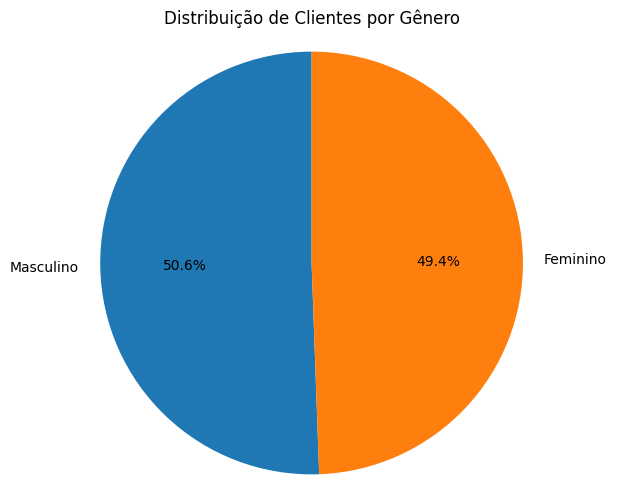

In [ ]:
# Traçando o perfil dos clientes por gênero
# Traduzindo os valores da coluna
df_final['Genero'] = df_final['Genero'].map({'Male': 'Masculino', 'Female': 'Feminino'})

# Gerando o gráfico de pizza
contagem_genero = df_final['Genero'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(contagem_genero, labels=contagem_genero.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Clientes por Gênero')
plt.axis('equal')
plt.show()



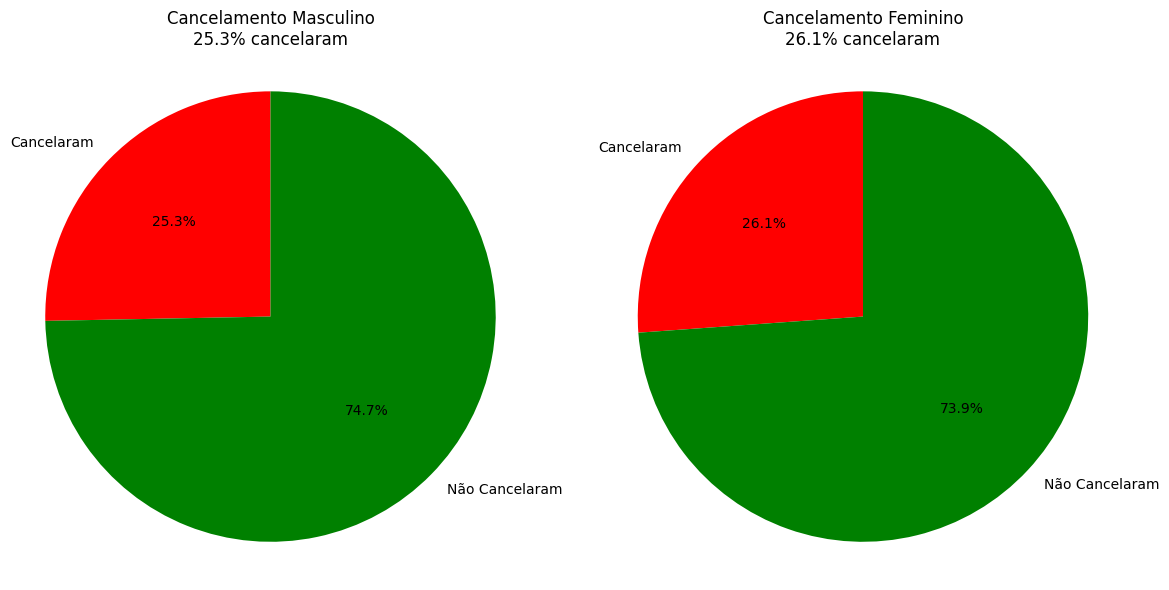

In [ ]:
#Analisando qual genero cancela mais. Comparamos a taxa de cancelamento de cada genero
import matplotlib.pyplot as plt

# Separando por gênero
masculinos = df_final[df_final['Genero'] == 'Masculino']
femininos = df_final[df_final['Genero'] == 'Feminino']

# Total de clientes por gênero
total_masc = len(masculinos)
total_fem = len(femininos)

# Número de cancelamentos (True) por gênero
cancel_masc = masculinos['Cancelou'] == True
cancel_fem = femininos['Cancelou'] == True

num_cancel_masc = cancel_masc.sum()
num_cancel_fem = cancel_fem.sum()

# Calculando percentual de cancelamento
perc_cancel_masc = (num_cancel_masc / total_masc) * 100
perc_cancel_fem = (num_cancel_fem / total_fem) * 100

# Dados para gráfico de pizza: cancelou vs não cancelou
dados_masc = [num_cancel_masc, total_masc - num_cancel_masc]
dados_fem = [num_cancel_fem, total_fem - num_cancel_fem]
labels = ['Cancelaram', 'Não Cancelaram']

# Criando os gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Masculino
axs[0].pie(dados_masc, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
axs[0].set_title(f'Cancelamento Masculino\n{perc_cancel_masc:.1f}% cancelaram')
axs[0].axis('equal')

# Feminino
axs[1].pie(dados_fem, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
axs[1].set_title(f'Cancelamento Feminino\n{perc_cancel_fem:.1f}% cancelaram')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


# Observando os dados notamos que apesar do numero de mulheres na base de dados ser relativamente 1.2 % menor o cancelamento é 0,8 % maior.

In [ ]:
# verificando qual o tipo de contrato mais usado por cada genero
pd.crosstab(df_final['Genero'], df_final['Tipo_Contrato'], normalize='index') * 100


Tipo_Contrato,Month-to-month,One year,Two year
Genero,,,
Feminino,55.178174,20.601336,24.220490
Masculino,55.047619,21.197279,23.755102


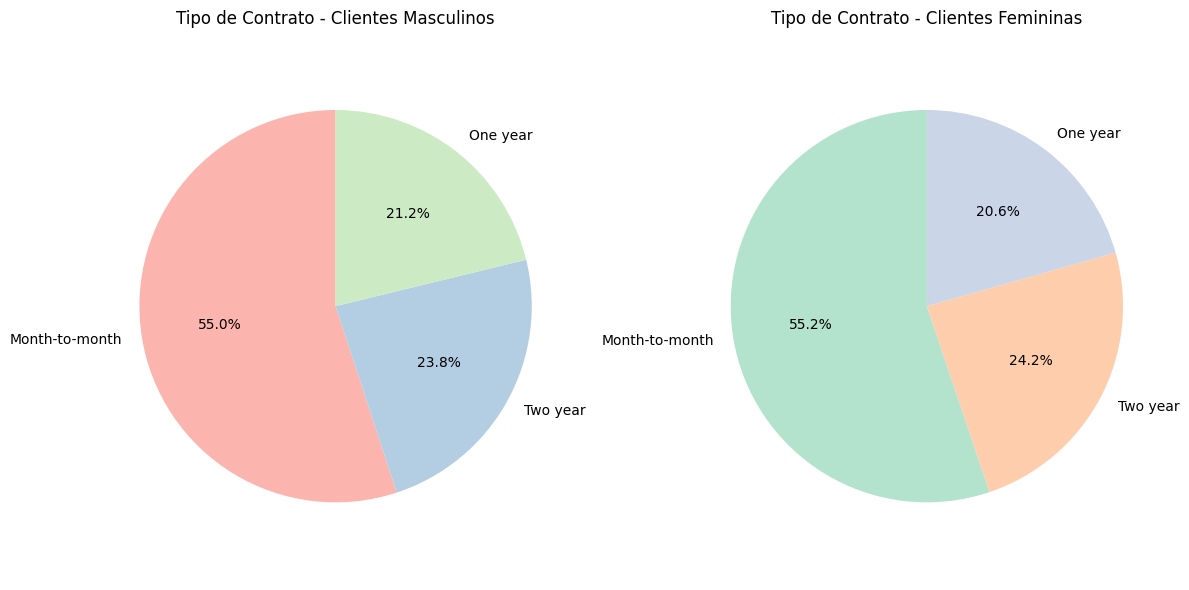

In [ ]:
import matplotlib.pyplot as plt

# Filtrando por gênero
masculinos = df_final[df_final['Genero'] == 'Masculino']
femininos = df_final[df_final['Genero'] == 'Feminino']

# Contagem do tipo de contrato
contrato_masc = masculinos['Tipo_Contrato'].value_counts()
contrato_fem = femininos['Tipo_Contrato'].value_counts()

# Criando os gráficos de pizza
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Masculino
axs[0].pie(
    contrato_masc,
    labels=contrato_masc.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors
)
axs[0].set_title('Tipo de Contrato - Clientes Masculinos')
axs[0].axis('equal')

# Feminino
axs[1].pie(
    contrato_fem,
    labels=contrato_fem.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel2.colors
)
axs[1].set_title('Tipo de Contrato - Clientes Femininas')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


Observamos que as mulheres tem uma leve diferença na contratação de planos, 0.2% mais plano mensal, 0,4% a mais no plano de dois anos e 0,6% a menos no plano anual. Embora sejam diferenças sutis podem demonstrar que o cancelamento pode esteja ligado ao tipo de plano. vamos investigar mais a fundo

In [ ]:
import plotly.express as px

# Recria o DataFrame (caso precise rodar isoladamente)
cancel_por_genero_contrato = df_final.groupby(['Tipo_Contrato', 'Genero'])['Cancelou'].mean().reset_index()
cancel_por_genero_contrato['Cancelou'] *= 100

# Gráfico com Plotly
fig = px.bar(
    cancel_por_genero_contrato,
    x='Tipo_Contrato',
    y='Cancelou',
    color='Genero',
    barmode='group',
    text=cancel_por_genero_contrato['Cancelou'].round(1),
    color_discrete_sequence=px.colors.qualitative.Set2,
    labels={'Cancelou': '% de Cancelamentos'},
    title='Percentual de Cancelamento por Tipo de Contrato e Gênero'
)

# Personalizações
fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis=dict(title='% de Cancelamentos', range=[0, cancel_por_genero_contrato['Cancelou'].max() + 5]),
    xaxis_title='Tipo de Contrato',
    legend_title='Gênero',
    bargap=0.2,
    template='plotly_white'
)

fig.show()


Observando o gráfico notamos que a maioria dos cancelamentos estão no plano month to month

In [ ]:
# comparando cancelamento com idade.
# A proporção dos cancelamentos efetivados (True), comparando: 🧓 Idosos 👤 Não Idosos

import plotly.express as px

# Filtrando apenas os clientes que cancelaram
cancelados = df_final[df_final['Cancelou'] == True]

# Contagem de cancelamentos por idade
cancelamento_por_idade = cancelados['Idoso'].value_counts().reset_index()
cancelamento_por_idade.columns = ['Idoso', 'Total_Cancelamentos']
cancelamento_por_idade['Faixa_Etaria'] = cancelamento_por_idade['Idoso'].map({0: 'Não Idoso', 1: 'Idoso'})

# Gráfico de pizza
fig = px.pie(
    cancelamento_por_idade,
    names='Faixa_Etaria',
    values='Total_Cancelamentos',
    color='Faixa_Etaria',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Distribuição dos Cancelamentos por Faixa Etária'
)

fig.update_traces(textinfo='percent+label', pull=[0.05, 0])
fig.update_layout(template='plotly_white')

fig.show()


Observamos que a maioria dos cancelamentos são realizados por não idosos,

Mas quanto da nossa base são idosos. Vamos comparar com a nossa base de dados

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#  Total geral de clientes por faixa etária
total_por_idade = df_final['Idoso'].value_counts().reset_index()
total_por_idade.columns = ['Idoso', 'Total']
total_por_idade['Faixa_Etaria'] = total_por_idade['Idoso'].map({0: 'Não Idoso', 1: 'Idoso'})

#  Apenas clientes que cancelaram
cancelados = df_final[df_final['Cancelou'] == True]
cancel_por_idade = cancelados['Idoso'].value_counts().reset_index()
cancel_por_idade.columns = ['Idoso', 'Total']
cancel_por_idade['Faixa_Etaria'] = cancel_por_idade['Idoso'].map({0: 'Não Idoso', 1: 'Idoso'})

#  Gráfico com duas pizzas
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Distribuição Geral da Base', 'Distribuição dos Cancelamentos'])

fig.add_trace(go.Pie(
    labels=total_por_idade['Faixa_Etaria'],
    values=total_por_idade['Total'],
    name='Base Geral',
    marker_colors=px.colors.qualitative.Set2
), 1, 1)

fig.add_trace(go.Pie(
    labels=cancel_por_idade['Faixa_Etaria'],
    values=cancel_por_idade['Total'],
    name='Cancelamentos',
    marker_colors=px.colors.qualitative.Set2
), 1, 2)

fig.update_traces(hole=0.4, textinfo='percent+label')
fig.update_layout(
    title_text='Comparação: Total de Clientes vs Cancelamentos por Faixa Etária',
    annotations=[dict(text='Base', x=0.18, y=0.5, font_size=14, showarrow=False),
                 dict(text='Cancelou', x=0.82, y=0.5, font_size=14, showarrow=False)],
    template='plotly_white'
)

fig.show()



In [ ]:
# criando taxa de cancelamento por faixa etaria
# Total de clientes por faixa etária
total_clientes_idade = df_final['Idoso'].value_counts().sort_index()

# Total de cancelamentos por faixa etária
total_cancelamentos_idade = df_final[df_final['Cancelou'] == True]['Idoso'].value_counts().sort_index()

# Calculando taxa de cancelamento (%)
taxa_cancelamento_idade = (total_cancelamentos_idade / total_clientes_idade * 100).reset_index()
taxa_cancelamento_idade.columns = ['Idoso', 'Taxa_Cancelamento']
taxa_cancelamento_idade['Faixa_Etaria'] = taxa_cancelamento_idade['Idoso'].map({0: 'Não Idoso', 1: 'Idoso'})

# Exibindo
taxa_cancelamento_idade[['Faixa_Etaria', 'Taxa_Cancelamento']]


,Faixa_Etaria,Taxa_Cancelamento
0,Não Idoso,22.892358
1,Idoso,40.270728


In [ ]:
# Visualizando em  gráfico
import plotly.express as px

fig = px.bar(
    taxa_cancelamento_idade,
    x='Faixa_Etaria',
    y='Taxa_Cancelamento',
    text=taxa_cancelamento_idade['Taxa_Cancelamento'].round(2),
    color='Faixa_Etaria',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Taxa de Cancelamento por Faixa Etária'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis_title='% de Cancelamento',
    xaxis_title='Faixa Etária',
    showlegend=False,
    template='plotly_white'
)

fig.show()


Podemos observar que comparado com a base de dados a taxa de cancelamento de idosos é 40,27% x 22.89% de não idosos.

In [ ]:
# verificando qual tipo de contrato mais cancela e Tipo de Fatura (Fatura Digital ou não)
# Total por tipo de contrato
total_contrato = df_final['Tipo_Contrato'].value_counts()

# Cancelamentos por tipo de contrato
cancel_contrato = df_final[df_final['Cancelou'] == True]['Tipo_Contrato'].value_counts()

# Taxa de cancelamento por tipo de contrato
taxa_cancelamento_contrato = (cancel_contrato / total_contrato * 100).reset_index()
taxa_cancelamento_contrato.columns = ['Tipo_Contrato', 'Taxa_Cancelamento']


In [ ]:
# gerando o grafico
fig1 = px.bar(
    taxa_cancelamento_contrato,
    x='Tipo_Contrato',
    y='Taxa_Cancelamento',
    text=taxa_cancelamento_contrato['Taxa_Cancelamento'].round(2),
    color='Tipo_Contrato',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Taxa de Cancelamento por Tipo de Contrato'
)

fig1.update_traces(textposition='outside')
fig1.update_layout(yaxis_title='% de Cancelamento', xaxis_title='Contrato', showlegend=False, template='plotly_white')
fig1.show()


In [ ]:
# Total por tipo de fatura
total_fatura = df_final['Fatura_Digital'].value_counts()

# Cancelamentos por tipo de fatura
cancel_fatura = df_final[df_final['Cancelou'] == True]['Fatura_Digital'].value_counts()

# Taxa
taxa_cancelamento_fatura = (cancel_fatura / total_fatura * 100).reset_index()
taxa_cancelamento_fatura.columns = ['Fatura_Digital', 'Taxa_Cancelamento']
taxa_cancelamento_fatura['Tipo_Fatura'] = taxa_cancelamento_fatura['Fatura_Digital'].map({True: 'Digital', False: 'Tradicional'})


In [ ]:
fig2 = px.bar(
    taxa_cancelamento_fatura,
    x='Tipo_Fatura',
    y='Taxa_Cancelamento',
    text=taxa_cancelamento_fatura['Taxa_Cancelamento'].round(2),
    color='Tipo_Fatura',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Taxa de Cancelamento por Tipo de Fatura'
)

fig2.update_traces(textposition='outside')
fig2.update_layout(yaxis_title='% de Cancelamento', xaxis_title='Fatura', showlegend=False, template='plotly_white')
fig2.show()


Contratos Mensais normalmente têm taxas de cancelamento muito mais altas.

Fatura digital pode estar relacionada a maior rotatividade se usada com clientes menos engajados digitalmente.

In [ ]:
print(df_final.columns)


Index(['ID_Cliente', 'Cancelou', 'Genero', 'Idoso', 'Tem_Parceiro',
       'Tem_Dependentes', 'Meses_Com_Empresa', 'Telefone_Fixo',
       'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital',
       'Metodo_Pagamento', 'Cobranca_Mensal', 'Cobranca_Total',
       'Status_Inferido'],
      dtype='object')


In [ ]:
# comparando o tempo de cliente com o cancelamento
import plotly.express as px

# Subconjunto com colunas corretas
df_tempo = df_final[['Meses_Com_Empresa', 'Cancelou']].copy()

# Convertendo 'Cancelou' para string para facilitar a legenda
df_tempo['Cancelou'] = df_tempo['Cancelou'].map({True: 'Cancelou', False: 'Não Cancelou'})

# Gráfico de histograma
fig = px.histogram(
    df_tempo,
    x='Meses_Com_Empresa',
    color='Cancelou',
    barmode='overlay',
    nbins=30,
    histnorm='percent',
    color_discrete_map={'Cancelou': 'red', 'Não Cancelou': 'green'},
    title='Distribuição do Tempo de Contrato por Status de Cancelamento'
)

fig.update_layout(
    xaxis_title='Tempo como Cliente (Meses)',
    yaxis_title='Distribuição (%)',
    template='plotly_white'
)

fig.show()


Observamos que 36% dos cancelamentos ocorrem entre 0 e 4 meses.

In [ ]:
# Comparando os percentuais de cancelamento para cada situação de suporte técnico.
# Agrupando por Suporte_Tecnico e calculando a média dos cancelamentos
cancel_por_suporte = df_final.groupby('Suporte_Tecnico')['Cancelou'].mean().reset_index()

# Convertendo para percentual
cancel_por_suporte['Cancelou'] *= 100

# Renomeando a coluna para clareza
cancel_por_suporte.columns = ['Suporte_Tecnico', 'Taxa_Cancelamento']
import plotly.express as px

fig = px.bar(
    cancel_por_suporte,
    x='Suporte_Tecnico',
    y='Taxa_Cancelamento',
    color='Suporte_Tecnico',
    text=cancel_por_suporte['Taxa_Cancelamento'].round(2),
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Taxa de Cancelamento por Uso de Suporte Técnico'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Suporte Técnico',
    yaxis_title='% de Cancelamento',
    showlegend=False,
    template='plotly_white'
)

fig.show()



Nota-se que quem tem suporte cancela mais, pode indicar que falta de suporte é uma dor.  Pode significar que o suporte não está sendo efetivo.

Para esclarecer mais vamos cruzar as informaões do uso do suporte, co tipo de contrato e tipo de internet

In [ ]:
# Agrupando por tipo de internet e suporte técnico
cancel_suporte_internet = df_final.groupby(['Tipo_Internet', 'Suporte_Tecnico'])['Cancelou'].mean().reset_index()
cancel_suporte_internet['Cancelou'] *= 100  # Convertendo para percentual
cancel_suporte_internet.columns = ['Tipo_Internet', 'Suporte_Tecnico', 'Taxa_Cancelamento']


In [ ]:
import plotly.express as px

fig = px.bar(
    cancel_suporte_internet,
    x='Tipo_Internet',
    y='Taxa_Cancelamento',
    color='Suporte_Tecnico',
    barmode='group',
    text=cancel_suporte_internet['Taxa_Cancelamento'].round(2),
    title='Taxa de Cancelamento por Tipo de Internet e Suporte Técnico',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    xaxis_title='Tipo de Internet',
    yaxis_title='% de Cancelamento',
    template='plotly_white'
)
fig.update_traces(textposition='outside')
fig.show()


In [ ]:
# Agrupando por tipo de contrato e suporte técnico
cancel_suporte_contrato = df_final.groupby(['Tipo_Contrato', 'Suporte_Tecnico'])['Cancelou'].mean().reset_index()

# Convertendo para percentual
cancel_suporte_contrato['Cancelou'] *= 100

# Renomeando colunas
cancel_suporte_contrato.columns = ['Tipo_Contrato', 'Suporte_Tecnico', 'Taxa_Cancelamento']


In [ ]:
import plotly.express as px

fig = px.bar(
    cancel_suporte_contrato,
    x='Tipo_Contrato',
    y='Taxa_Cancelamento',
    color='Suporte_Tecnico',
    barmode='group',
    text=cancel_suporte_contrato['Taxa_Cancelamento'].round(2),
    title='Taxa de Cancelamento por Tipo de Contrato e Suporte Técnico',
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(
    xaxis_title='Tipo de Contrato',
    yaxis_title='% de Cancelamento',
    template='plotly_white'
)
fig.update_traces(textposition='outside')
fig.show()


Observado que quem tem contrato mensal sem suporte cancela mais, porem nos cancelamentos com tempo maior de assinatura quem cancela são os clientes com suporte demonstrando certo grau de insatisfação com o serviço.

Vamos continuar analisando para ver se o suporte reduz as taxas de cancelamento

In [ ]:
df_final['Suporte_Tecnico'].unique()


array([True, False, 'No internet service'], dtype=object)

In [ ]:
# Filtra registros válidos: Suporte_Tecnico apenas True ou False
filtro_suporte_valido = df_final['Suporte_Tecnico'].isin([True, False])
filtro_internet_valido = df_final['Tipo_Internet'] != 'No internet service'

# Aplica os dois filtros
df_filtrado = df_final[filtro_suporte_valido & filtro_internet_valido]


In [ ]:
df_filtrado['Suporte_Tecnico'].unique()


array([True, False], dtype=object)

In [ ]:
# Agrupando e calculando a média de cancelamentos
cancelamento_por_suporte = df_filtrado.groupby(['Tipo_Contrato', 'Suporte_Tecnico'])['Cancelou'].mean().unstack()

# Transformando em percentual
cancelamento_por_suporte *= 100

# Renomeando colunas
cancelamento_por_suporte.columns = ['Sem_Suporte', 'Com_Suporte']

# Calculando a diferença
cancelamento_por_suporte['Diferença'] = cancelamento_por_suporte['Sem_Suporte'] - cancelamento_por_suporte['Com_Suporte']

# Exibindo resultado
cancelamento_por_suporte


,Sem_Suporte,Com_Suporte,Diferença
Tipo_Contrato,,,
Month-to-month,50.373134,30.700447,19.672687
One year,14.721724,13.586957,1.134767
Two year,5.932203,3.532278,2.399926


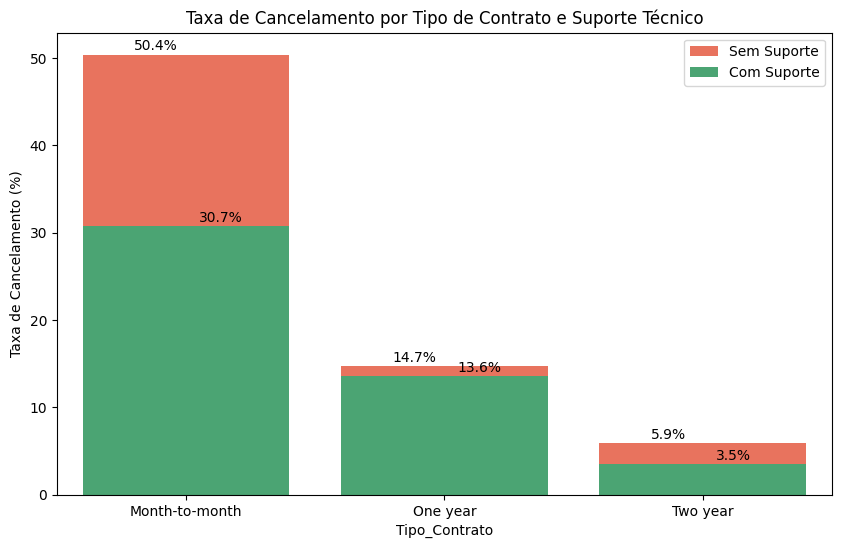

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resetando índice para facilitar o plot
df_plot = cancelamento_por_suporte.reset_index()

plt.figure(figsize=(10,6))

# Barras lado a lado para Sem_Suporte e Com_Suporte
sns.barplot(data=df_plot, x='Tipo_Contrato', y='Sem_Suporte', color='tomato', label='Sem Suporte')

sns.barplot(data=df_plot, x='Tipo_Contrato', y='Com_Suporte', color='mediumseagreen', label='Com Suporte')

plt.ylabel('Taxa de Cancelamento (%)')
plt.title('Taxa de Cancelamento por Tipo de Contrato e Suporte Técnico')
plt.legend()

# Para colocar os valores das barras em cima
for i, row in df_plot.iterrows():
    plt.text(i - 0.2, row['Sem_Suporte'] + 0.5, f"{row['Sem_Suporte']:.1f}%", color='black')
    plt.text(i + 0.05, row['Com_Suporte'] + 0.5, f"{row['Com_Suporte']:.1f}%", color='black')

plt.show()


In [ ]:
#comparando valor mensal com cancelamentos
import numpy as np

# Captura o valor máximo da cobrança mensal
max_cobranca = df_final['Cobranca_Mensal'].max()

# Arredonda o máximo para o próximo múltiplo de 50
max_bin = (np.ceil(max_cobranca / 50) * 50)

# Define os bins padrão até 250
bins = [0, 50, 100, 150, 200, 250]

# Se o máximo for maior que 250, adiciona o limite maior
if max_bin > 250:
    bins.append(max_bin)

# Ordena e remove duplicados, só para garantir
bins = sorted(set(bins))

# Define os labels para as faixas (o último pode ficar genérico)
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]

# Cria a coluna faixa de cobrança
df_final['Faixa_Cobranca'] = pd.cut(df_final['Cobranca_Mensal'], bins=bins, labels=labels, include_lowest=True)

# Calcula a taxa de cancelamento por faixa de cobrança
cancel_por_faixa = df_final.groupby('Faixa_Cobranca')['Cancelou'].mean() * 100

print(cancel_por_faixa)


Faixa_Cobranca
0-49       15.702479
50-99      32.665279
100-149     28.04878
150-199          NaN
200-249          NaN
Name: Cancelou, dtype: object


<ipython-input-103-ca47982a35cf>:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
import plotly.express as px

# Preparar dados para o gráfico
df_plot = cancel_por_faixa.reset_index()
df_plot.columns = ['Faixa de Cobrança (R$)', 'Taxa de Cancelamento (%)']

# Criar gráfico de barras
fig = px.bar(
    df_plot,
    x='Faixa de Cobrança (R$)',
    y='Taxa de Cancelamento (%)',
    title='Taxa de Cancelamento por Faixa de Cobrança Mensal',
    labels={'Taxa de Cancelamento (%)': '% Cancelamento', 'Faixa de Cobrança (R$)': 'Faixa de Cobrança Mensal (R$)'},
    text='Taxa de Cancelamento (%)',
    color='Taxa de Cancelamento (%)',
    color_continuous_scale='Viridis'
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(yaxis_range=[0, df_plot['Taxa de Cancelamento (%)'].max() + 5])

fig.show()


Observa-se que a maior taxa de cancelamento ocorre com a faixa media de preços.

#📄Relatorio Final

# 📊 Relatório de Análise de Evasão de Clientes (Churn)

---

## 1. Introdução

O objetivo desta análise é investigar os motivos que levam clientes a cancelarem seus serviços (churn) e identificar padrões de comportamento que ajudem a prever e reduzir a evasão de clientes.

Foram utilizadas as bibliotecas: `pandas`, `numpy`, `seaborn` e `matplotlib` para análise dos dados e geração de visualizações.

A base de dados foi importada de um arquivo JSON. Realizamos o tratamento necessário para analisar corretamente o perfil dos clientes, os tipos de contratos, suporte técnico e demais variáveis que possam influenciar no cancelamento dos serviços.

---

## 2. Limpeza e Tratamento de Dados

- Importação da base de dados;
- Renomeação de colunas para melhor entendimento;
- Tratamento de valores inválidos e dados faltantes;
- Identificados 224 clientes com a coluna `cancelou` em branco (aproximadamente 3,08% da base):
  - Esses casos foram analisados para verificar se são clientes ativos, novos ou erro de preenchimento.

---

## 3. Análise Exploratória de Dados (EDA)

### 📌 Gênero
- Mulheres representam 1,2% a menos da base total, mas possuem uma taxa de cancelamento 0,8% maior.
- Diferenças sutis nos planos:
  - Mulheres tendem a contratar 0,2% mais o plano mensal;
  - 0,4% a mais no plano de dois anos;
  - 0,6% a menos no plano anual.

### 📌 Faixa Etária
- A maioria dos cancelamentos são realizados por **não idosos**;
- Mas a taxa proporcional de cancelamento entre **idosos é maior**:
  - Idosos: **40,27%**
  - Não idosos: **22,89%**

### 📌 Tipo de Contrato
- Contratos **mensais** têm alta taxa de cancelamento:
  - Baixo comprometimento → fácil cancelamento.
- **Contratos longos com suporte** também apresentam evasão:
  - Pode indicar frustração ou suporte inefetivo ao longo do tempo.

### 📌 Suporte Técnico
- Clientes com **suporte** cancelam mais em alguns casos:
  - Indica que o suporte **pode não estar sendo eficiente**.
- Quando cruzamos com tipo de contrato:
  - Clientes com **contrato mensal e sem suporte** são os que **mais cancelam rapidamente**.
  - Cancelamentos com **maior tempo de assinatura** ocorrem entre clientes **com suporte**, mostrando insatisfação acumulada.

### 📌 Tempo de Permanência
- **36% dos cancelamentos** ocorrem entre **0 e 4 meses** de contrato.
  - Indica insatisfação nos primeiros contatos com o serviço.

### 📌 Fatura Digital
- Pode estar associada a maior rotatividade entre clientes menos engajados digitalmente.

---

## 4. Conclusões e Insights

### Insight 1: Contrato Mensal + Sem Suporte
- Alta taxa de cancelamento (esperado).
- Clientes mais sensíveis → alvo ideal para ações de retenção.

### Insight 2: Contrato Longo + Com Suporte
- Também apresentam cancelamentos (inesperado).
- Indica que o suporte pode não estar atendendo às expectativas.

### Insight 3: Idosos cancelam mais proporcionalmente
- Estratégias de comunicação e atendimento específicas podem ser necessárias.

### Insight 4: Primeiros meses são críticos
- 36% dos cancelamentos ocorrem logo no início.
- Melhorar a jornada inicial do cliente é fundamental.

---

## 5. Recomendações

- **Fidelização de clientes com contrato mensal**, oferecendo planos com benefícios adicionais e suporte incluso.
- **Auditar o suporte técnico**: pesquisar a satisfação e eficácia real dos atendimentos.
- Criar um **programa de onboarding** mais robusto para os primeiros meses.
- Oferecer **opções à fatura digital** ou suporte para clientes com menor familiaridade digital.
- **Personalizar a abordagem para idosos**, com canais de atendimento facilitados e linguagem acessível.

---

## ✅ Próximos Passos

- Validar hipóteses com modelos preditivos de churn;
- Segmentar clientes em grupos de risco;
- Implementar testes A/B com diferentes abordagens de retenção.
